In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu, wilcoxon
from statsmodels.formula.api import ols
from statsmodels.stats.anova import AnovaRM
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Read data

In [35]:
#data = pd.read_csv('reaction_times.csv')
data = pd.read_csv(r'reaction_times.csv')

# Find accuracy and mean per congruent and incongruent

In [36]:
avg_incongruent = []
avg_congruent = []
accuracy_incongruent = []
accuracy_congruent = []

for row in data.iterrows():
    acc_incongruent = []
    acc_congruent = []

    mean_incongruent = []
    mean_congruent = []

    for i in range(1, 21):
        print(row[1][i])
        if row[1][i] == False and row[1][i + 40] == "Correct":
            mean_incongruent.append(row[1][i + 20])
            acc_incongruent.append(1)
        elif row[1][i] == False and row[1][i + 40] == "Incorrect":
            acc_incongruent.append(0)
        elif row[1][i] == True and row[1][i + 40] == "Correct":
            mean_congruent.append(row[1][i + 20])
            acc_congruent.append(1)
        elif row[1][i] == True and row[1][i + 40] == "Incorrect":
            acc_congruent.append(0)

    avg_incongruent.append(np.mean(mean_incongruent))
    avg_congruent.append(np.mean(mean_congruent))
    accuracy_incongruent.append(np.sum(acc_incongruent)/len(acc_incongruent))
    accuracy_congruent.append(np.sum(acc_congruent)/len(acc_congruent))

1
M
exercise
29
09:33:36
False
True
False
False
True
False
False
False
True
False
False
False
True
True
True
2
M
exercise
29
09:43:55
True
False
True
True
True
True
False
True
True
True
True
True
True
False
False
1
M
exercise
29
08:04:14
False
False
True
False
True
True
True
True
False
False
True
True
True
True
True
2
M
exercise
29
08:12:49
True
False
False
True
False
True
True
False
False
True
False
True
True
False
True
1
F
exercise
24
09:19:54
False
True
False
True
False
False
False
False
False
False
False
False
False
False
False
2
F
exercise
24
09:28:43
False
False
False
True
False
False
False
False
False
False
True
False
False
True
True
1
F
exercise
26
09:35:05
False
True
False
False
False
False
True
False
False
False
False
True
False
False
False
2
F
exercise
26
09:43:12
True
True
True
False
False
False
False
False
True
False
False
False
False
True
False
1
F
exercise
25
10:16:02
True
False
False
False
False
False
True
False
True
False
False
False
False
False
True
2
F
exercise
25
10

/tmp/ipykernel_11218/2092079224.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(row[1][i])
/tmp/ipykernel_11218/2092079224.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if row[1][i] == False and row[1][i + 40] == "Correct":
/tmp/ipykernel_11218/2092079224.py:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif row[1][i] == False and row[1][i + 40] == "Incorrect":
/tmp/ipykernel_11218/2092079224.py:20: FutureWarni

# Add columns to df

In [37]:
data["avg_incongruent"] = avg_incongruent
data["avg_congruent"] = avg_congruent
data["acc_incongruent"] = accuracy_incongruent
data["acc_congruent"] = accuracy_congruent

# Split into control and exercise group

In [38]:
execise = data[data["group"] == "exercise"]
control = data[data["group"] == "control"]

In [39]:
exercise_1 = execise[execise["trial"] == 1]
control_1 = control[control["trial"] == 1]
exercise_2 = execise[execise["trial"] == 2]
control_2 = control[control["trial"] == 2]

# get mean rt and acc for whole group

In [40]:
rt_exercise_1 = np.mean(exercise_1["avg_incongruent"])
rt_exercise_2 = np.mean(exercise_2["avg_incongruent"])
rt_control_1 = np.mean(control_1["avg_incongruent"])
rt_control_2 = np.mean(control_2["avg_incongruent"])

In [41]:
rt_exercise_11 = np.mean(exercise_1["avg_congruent"])
rt_exercise_22 = np.mean(exercise_2["avg_congruent"])
rt_control_11 = np.mean(control_1["avg_congruent"])
rt_control_22 = np.mean(control_2["avg_congruent"])

In [42]:
exerc = [rt_exercise_1, rt_exercise_2]
contr = [rt_control_1, rt_control_2]

In [43]:
exercc = [rt_exercise_11, rt_exercise_22]
contrr = [rt_control_11, rt_control_22]

In [44]:
exerc + contr

[1.7005636160806314, 1.5575631991207215, 1.6456003209235401, 1.537625580224003]

Text(0.5, 1.0, 'Reaction time Incongruent by group and trial')

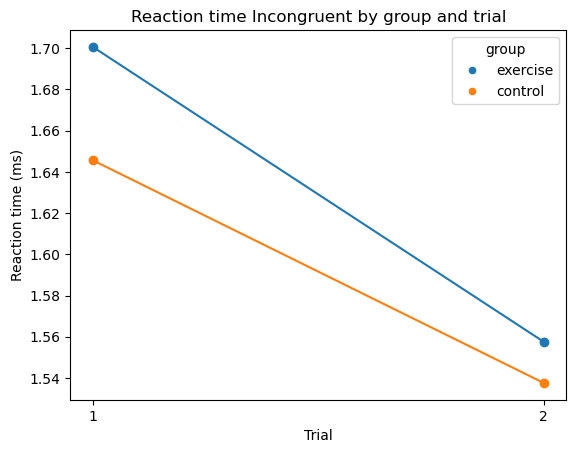

In [45]:
#connect the lines
plt.plot([1, 2], exerc, marker='o')
plt.plot([1, 2], contr, marker='o')
plot_data = pd.DataFrame({
    'trial': [1, 2, 1, 2],
    'reaction_time': exerc + contr,
    'group': ['exercise', 'exercise', 'control', 'control']
})
#add labels 
sns.scatterplot(data=plot_data, x='trial', y='reaction_time', hue='group')
plt.xlabel('Trial')
plt.xticks([1, 2])
plt.ylabel('Reaction time (ms)')
plt.title('Reaction time Incongruent by group and trial')


Text(0.5, 1.0, 'Reaction time Congruent by group and trial')

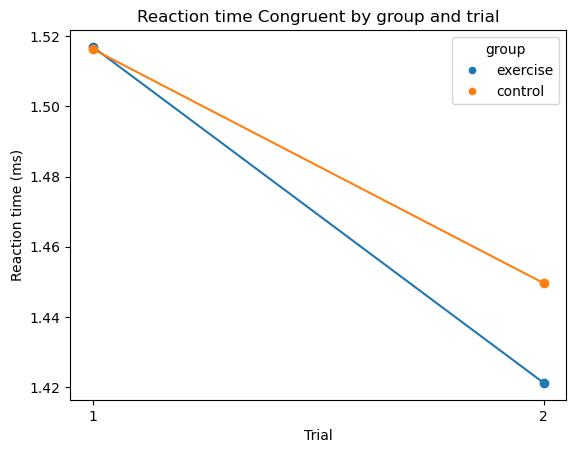

In [46]:
#connect the lines
plt.plot([1, 2], exercc, marker='o')
plt.plot([1, 2], contrr, marker='o')
plot_data = pd.DataFrame({
    'trial': [1, 2, 1, 2],
    'reaction_time': exercc + contrr,
    'group': ['exercise', 'exercise', 'control', 'control']
})
#add labels 
sns.scatterplot(data=plot_data, x='trial', y='reaction_time', hue='group')
plt.xlabel('Trial')
plt.xticks([1, 2])
plt.ylabel('Reaction time (ms)')
plt.title('Reaction time Congruent by group and trial')

# box plot

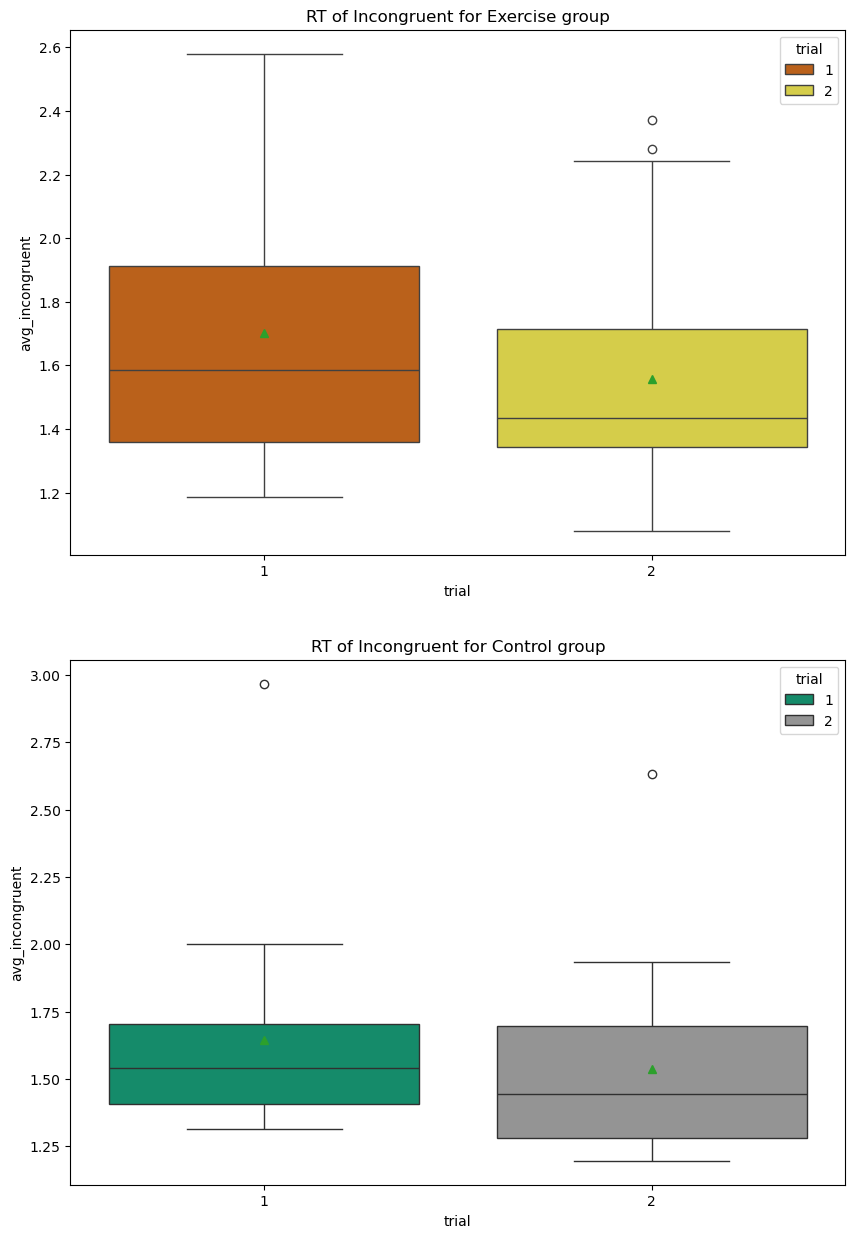

In [47]:
colorblind_palette = sns.color_palette("colorblind")
fig, ax = plt.subplots(2, 1, figsize=(10, 15))
sns.boxplot(x="trial", y="avg_incongruent", data=execise, ax=ax[0], hue='trial', palette=[colorblind_palette[3], colorblind_palette[8]], legend=True, showmeans=True)
ax[0].set_title("RT of Incongruent for Exercise group")
# sns.boxplot(x="trial", y="avg_congruent", data=execise, ax=ax[0, 1],hue='trial',palette=[colorblind_palette[3], colorblind_palette[8]], legend=False)
# ax[0, 1].set_title("RT of Congruent for Exercise group")

sns.boxplot(x="trial", y="avg_incongruent", data=control, ax=ax[1], hue='trial', palette=[colorblind_palette[2], colorblind_palette[7]], legend=True, showmeans=True)
ax[1].set_title("RT of Incongruent for Control group")
# sns.boxplot(x="trial", y="avg_congruent", data=control, ax=ax[1, 1],hue='trial',palette=[colorblind_palette[2], colorblind_palette[7]], legend=False)
# ax[1, 1].set_title("RT of Congruent for Control group")

plt.show()

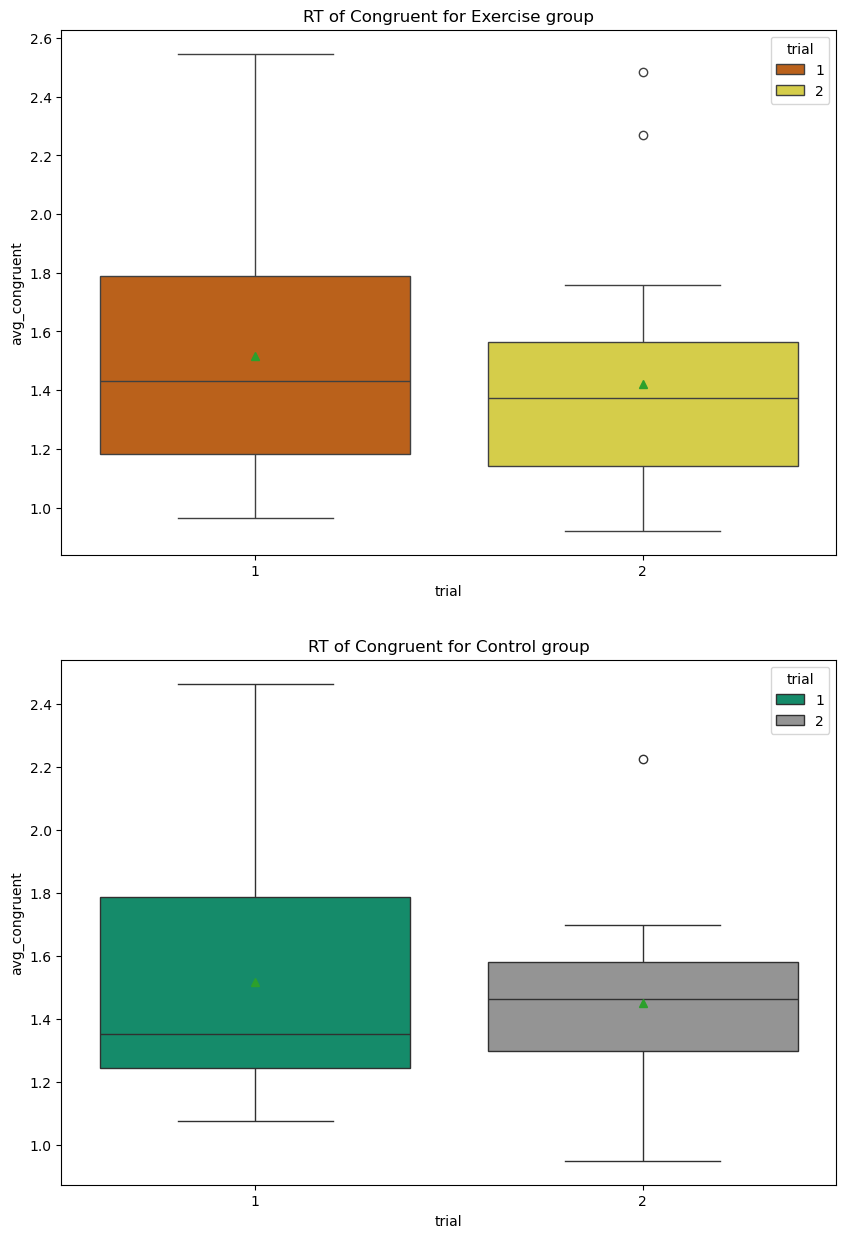

In [48]:
colorblind_palette = sns.color_palette("colorblind")
fig, ax = plt.subplots(2, 1, figsize=(10, 15))
sns.boxplot(x="trial", y="avg_congruent", data=execise, ax=ax[0], hue='trial', palette=[colorblind_palette[3], colorblind_palette[8]], legend=True, showmeans=True)
ax[0].set_title("RT of Congruent for Exercise group")


sns.boxplot(x="trial", y="avg_congruent", data=control, ax=ax[1], hue='trial', palette=[colorblind_palette[2], colorblind_palette[7]], legend=True, showmeans=True)
ax[1].set_title("RT of Congruent for Control group")


plt.show()

/tmp/ipykernel_11218/2801333809.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="trial_group", y="avg_incongruent", data=plot_data, palette=box_colors, showmeans=True, ax=ax)
/tmp/ipykernel_11218/2801333809.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=30)


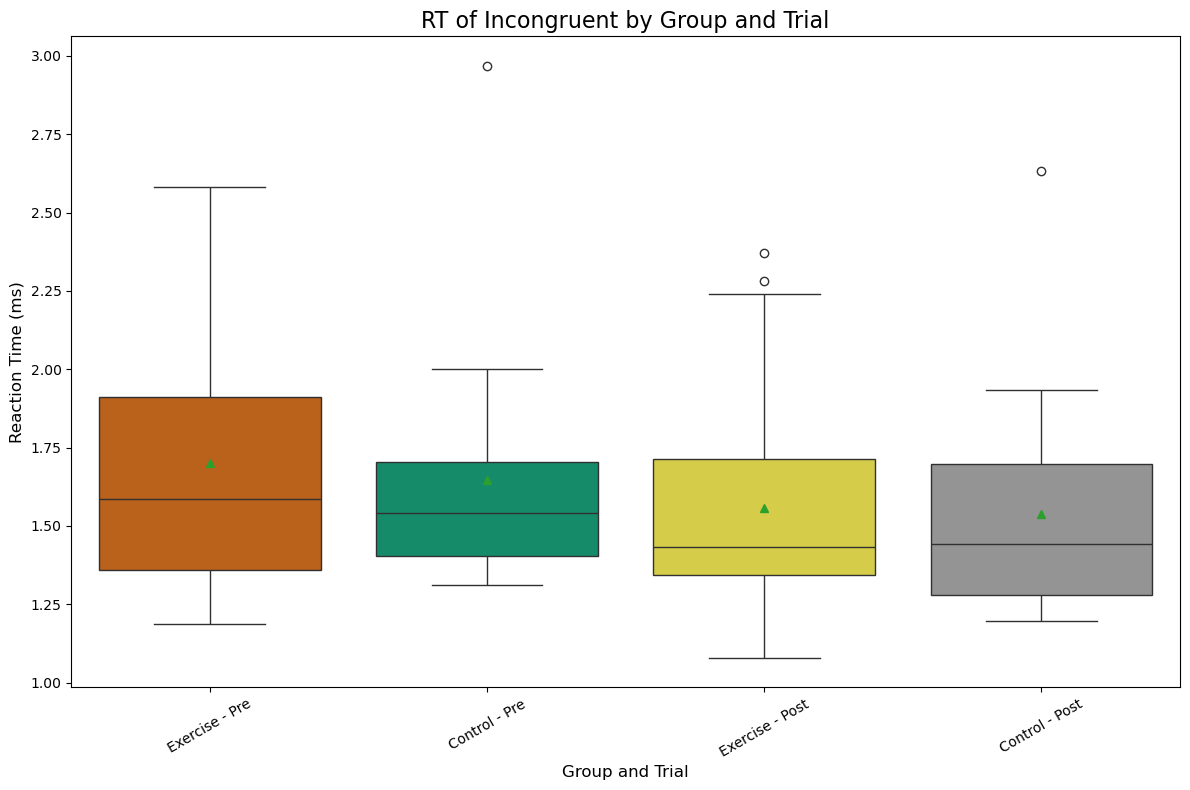

In [49]:
colorblind_palette = sns.color_palette("colorblind")

# Create a single subplot for all four boxplots
fig, ax = plt.subplots(figsize=(12, 8))

# Combine exercise and control groups for Trial 1 and Trial 2 into one DataFrame
plot_data = pd.concat([
    execise[execise["trial"] == 1].assign(trial_group="Exercise - Pre"),
    control[control["trial"] == 1].assign(trial_group="Control - Pre"),
    execise[execise["trial"] == 2].assign(trial_group="Exercise - Post"),
    control[control["trial"] == 2].assign(trial_group="Control - Post")
])

# Define colors for the four groups
box_colors = [colorblind_palette[3],  # Orange for Exercise - Trial 1
              colorblind_palette[2],  # Green for Control - Trial 1
              colorblind_palette[8],  # Yellow for Exercise - Trial 2
              colorblind_palette[7]]  # Gray for Control - Trial 2

# Plot all four boxplots on the same axis
sns.boxplot(x="trial_group", y="avg_incongruent", data=plot_data, palette=box_colors, showmeans=True, ax=ax)

# Customize the plot
ax.set_title("RT of Incongruent by Group and Trial", fontsize=16)
ax.set_xlabel("Group and Trial", fontsize=12)
ax.set_ylabel("Reaction Time (ms)", fontsize=12)
ax.set_xticklabels(ax.get_xticklabels(), rotation=30)

# Show the plot
plt.tight_layout()
plt.show()



/tmp/ipykernel_11218/897777778.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="trial_group", y="avg_congruent", data=plot_data, palette=box_colors, showmeans=True, ax=ax)
/tmp/ipykernel_11218/897777778.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=30)


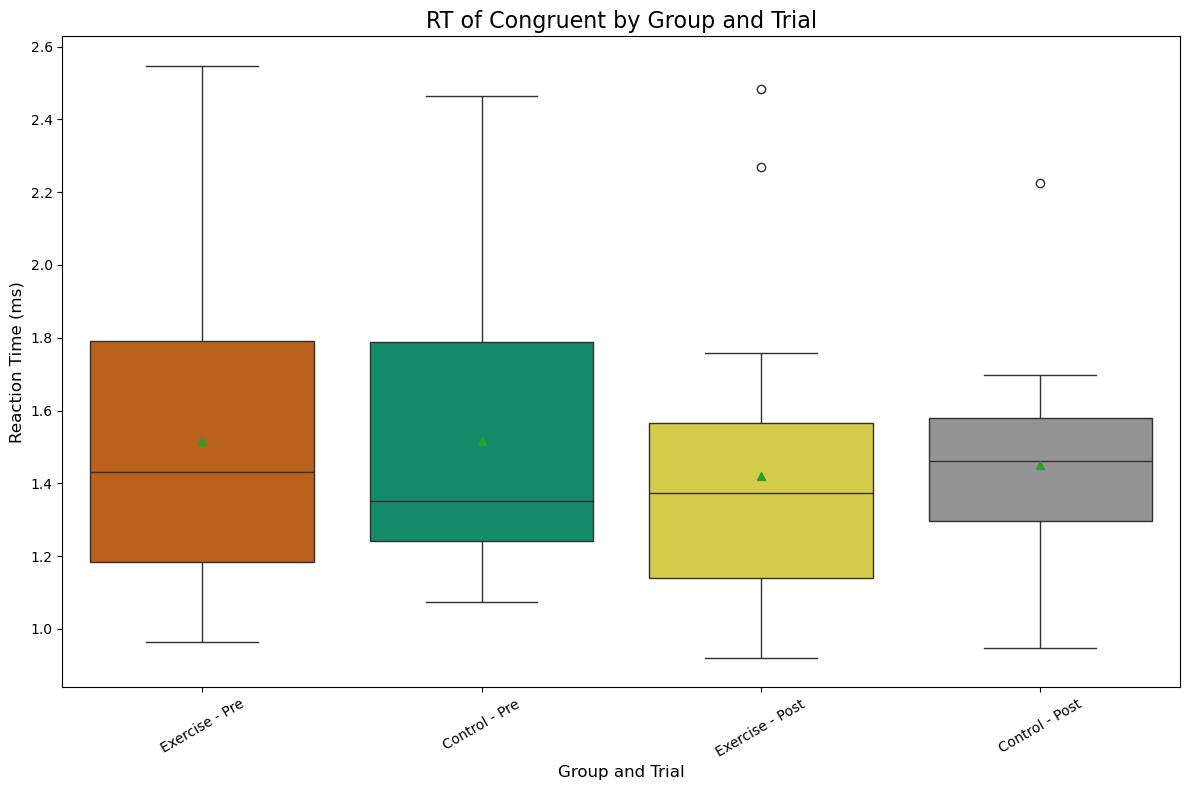

In [50]:
colorblind_palette = sns.color_palette("colorblind")

# Create a single subplot for all four boxplots
fig, ax = plt.subplots(figsize=(12, 8))

# Combine exercise and control groups for Trial 1 and Trial 2 into one DataFrame
plot_data = pd.concat([
    execise[execise["trial"] == 1].assign(trial_group="Exercise - Pre"),
    control[control["trial"] == 1].assign(trial_group="Control - Pre"),
    execise[execise["trial"] == 2].assign(trial_group="Exercise - Post"),
    control[control["trial"] == 2].assign(trial_group="Control - Post")
])

# Define colors for the four groups
box_colors = [colorblind_palette[3],  # Orange for Exercise - Trial 1
              colorblind_palette[2],  # Green for Control - Trial 1
              colorblind_palette[8],  # Yellow for Exercise - Trial 2
              colorblind_palette[7]]  # Gray for Control - Trial 2

# Plot all four boxplots on the same axis
sns.boxplot(x="trial_group", y="avg_congruent", data=plot_data, palette=box_colors, showmeans=True, ax=ax)

# Customize the plot
ax.set_title("RT of Congruent by Group and Trial", fontsize=16)
ax.set_xlabel("Group and Trial", fontsize=12)
ax.set_ylabel("Reaction Time (ms)", fontsize=12)
ax.set_xticklabels(ax.get_xticklabels(), rotation=30)

# Show the plot
plt.tight_layout()
plt.show()


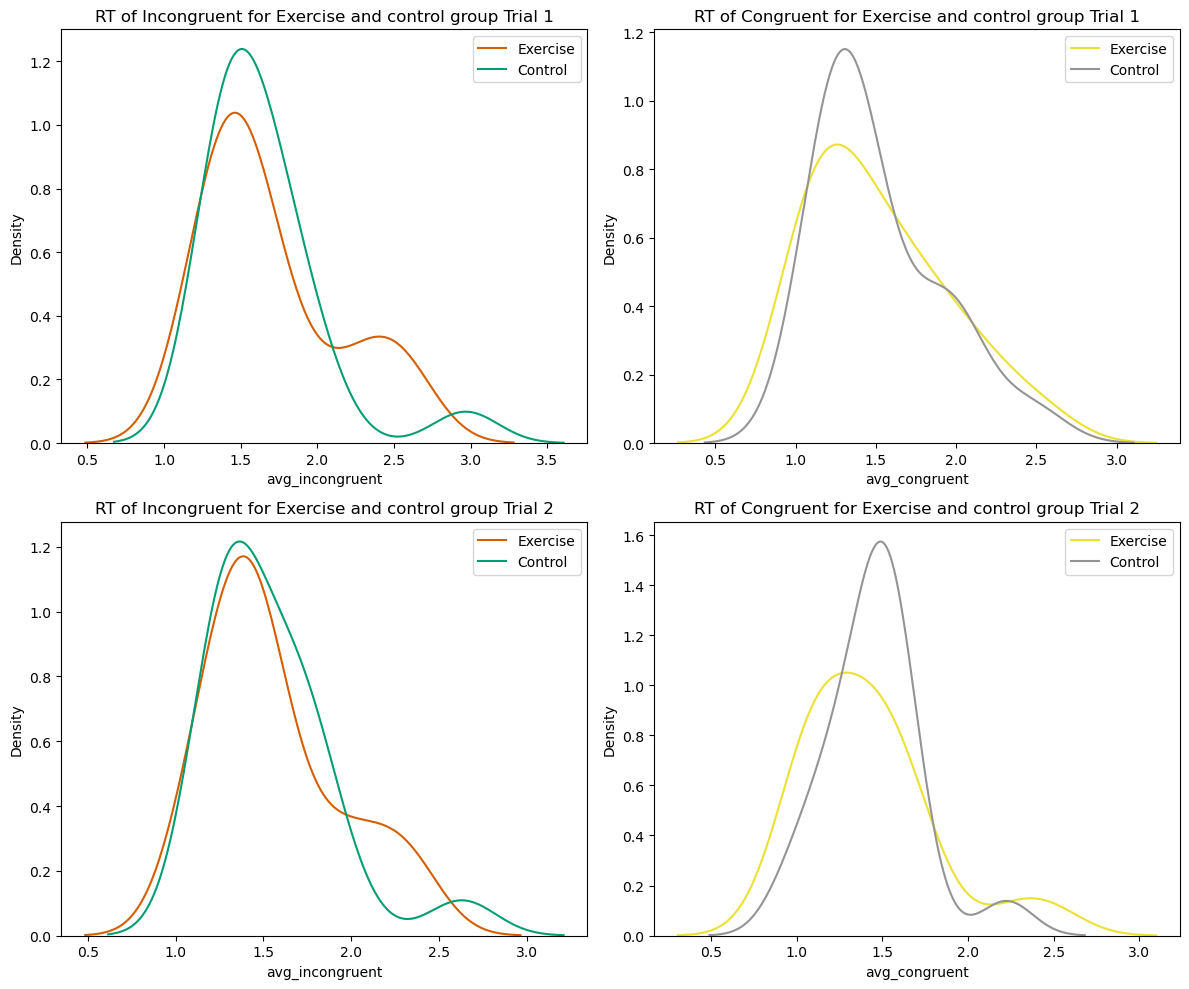

In [51]:
# Assuming execise is your DataFrame and colorblind_palette is defined
fig, ax = plt.subplots(2, 2, figsize=(12, 10))

# KDE plot for the 'avg_incongruent' column
sns.kdeplot(exercise_1["avg_incongruent"], ax=ax[0,0], color=colorblind_palette[3])
sns.kdeplot(control_1["avg_incongruent"], ax=ax[0,0], color=colorblind_palette[2])
ax[0,0].set_title("RT of Incongruent for Exercise and control group Trial 1")
ax[0,0].legend(["Exercise", "Control"])
# KDE plot for the 'avg_congruent' column
sns.kdeplot(exercise_1["avg_congruent"], ax=ax[0,1], color=colorblind_palette[8])
sns.kdeplot(control_1["avg_congruent"], ax=ax[0,1], color=colorblind_palette[7])
ax[0,1].set_title("RT of Congruent for Exercise and control group Trial 1")
ax[0,1].legend(["Exercise", "Control"])

# KDE plot for the 'avg_incongruent' column
sns.kdeplot(exercise_2["avg_incongruent"], ax=ax[1,0], color=colorblind_palette[3])
sns.kdeplot(control_2["avg_incongruent"], ax=ax[1,0], color=colorblind_palette[2])
ax[1,0].set_title("RT of Incongruent for Exercise and control group Trial 2")
ax[1,0].legend(["Exercise", "Control"])

# KDE plot for the 'avg_congruent' column
sns.kdeplot(exercise_2["avg_congruent"], ax=ax[1,1], color=colorblind_palette[8])
sns.kdeplot(control_2["avg_congruent"], ax=ax[1,1], color=colorblind_palette[7])
ax[1,1].set_title("RT of Congruent for Exercise and control group Trial 2")
ax[1,1].legend(["Exercise", "Control"]) 


plt.tight_layout()
plt.show()

In [52]:
print(f"error rate for incon exercise 1 is  {1- exercise_1.acc_incongruent.mean()}")
print(f"error rate for incon control 1 is  {1- control_1.acc_incongruent.mean()}")
print(f"error rate for incon exercise 1 is  {1- exercise_2.acc_incongruent.mean()}")
print(f"error rate for incon control  1 is  {1- control_2.acc_incongruent.mean()}")

error rate for incon exercise 1 is  0.011622636622636517
error rate for incon control 1 is  0.012280701754386003
error rate for incon exercise 1 is  0.0
error rate for incon control  1 is  0.022898154477101862


In [53]:
print(f"error rate for con exercise 1 is  {1- exercise_1.acc_congruent.mean()}")
print(f"error rate for con control 1 is  {1- control_1.acc_congruent.mean()}")
print(f"error rate for con exercise 1 is  {1- exercise_2.acc_congruent.mean()}")
print(f"error rate for con control  1 is  {1- control_2.acc_congruent.mean()}")

error rate for con exercise 1 is  0.007246376811594124
error rate for con control 1 is  0.0
error rate for con exercise 1 is  0.0
error rate for con control  1 is  0.0


In [54]:
print(f"avg rt for incongruent exercise 1 is {exercise_1.avg_incongruent.mean()}")
print(f"avg rt for incongruent control 1 is {control_1.avg_incongruent.mean()}")
print(f"avg rt for incongruent exercise 2 is {exercise_2.avg_incongruent.mean()}")
print(f"avg rt for incongruent control 2 is {control_2.avg_incongruent.mean()}")

avg rt for incongruent exercise 1 is 1.7005636160806314
avg rt for incongruent control 1 is 1.6456003209235401
avg rt for incongruent exercise 2 is 1.5575631991207215
avg rt for incongruent control 2 is 1.537625580224003


In [55]:
print(f"avg rt for congruent exercise 1 is {exercise_1.avg_congruent.mean()}")
print(f"avg rt for congruent control 1 is {control_1.avg_congruent.mean()}")
print(f"avg rt for congruent exercise 2 is {exercise_2.avg_congruent.mean()}")
print(f"avg rt for congruent control 2 is {control_2.avg_congruent.mean()}")

avg rt for congruent exercise 1 is 1.5169233457684512
avg rt for congruent control 1 is 1.5162896281927498
avg rt for congruent exercise 2 is 1.4211855569158098
avg rt for congruent control 2 is 1.4496113446881502


# Testing normality of data

In [56]:
from scipy.stats import shapiro
print(shapiro(exercise_1.avg_incongruent))
print(shapiro(control_1.avg_incongruent))
print(shapiro(exercise_2.avg_incongruent)) # the only one that is normally distributed
print(shapiro(control_2.avg_incongruent))

ShapiroResult(statistic=0.840764921986995, pvalue=0.0014802672869530687)
ShapiroResult(statistic=0.7420656020633202, pvalue=0.00018448701925236318)
ShapiroResult(statistic=0.88564940473637, pvalue=0.01081855542568912)
ShapiroResult(statistic=0.8221379996297701, pvalue=0.0024409518217773005)


In [57]:
from scipy.stats import shapiro
exercise_1_clean = exercise_1["avg_congruent"].dropna()
control_1_clean = control_1["avg_congruent"].dropna()
exercise_2_clean = exercise_2["avg_congruent"].dropna()
print(shapiro(exercise_1_clean))
print(shapiro(control_1_clean))
print(shapiro(exercise_2_clean)) 
print(shapiro(control_2.avg_congruent)) # the only one that is normally distributed

ShapiroResult(statistic=0.9309180766053369, pvalue=0.11447497292976372)
ShapiroResult(statistic=0.8609883129798035, pvalue=0.012682861185052557)
ShapiroResult(statistic=0.8852911840654432, pvalue=0.012733514529717207)
ShapiroResult(statistic=0.9194619628534789, pvalue=0.11060560497584143)


In [58]:
exercise_1.iloc[:control_1.shape[0]]

,id,trial,gender,group,age,time,trial_type1,trial_type2,trial_type3,trial_type4,...,accuracy15,accuracy16,accuracy17,accuracy18,accuracy19,accuracy20,avg_incongruent,avg_congruent,acc_incongruent,acc_congruent
0,1,1,M,exercise,29,09:33:36,False,True,False,False,...,Correct,Correct,Correct,Correct,Correct,Correct,1.436996,1.309070,1.000000,1.000000
2,2,1,M,exercise,29,08:04:14,False,False,True,False,...,Correct,Correct,Correct,Correct,Correct,Correct,1.673754,1.058546,1.000000,1.000000
4,3,1,F,exercise,24,09:19:54,False,True,False,True,...,Correct,Correct,Correct,Correct,Correct,Correct,1.364825,1.141288,1.000000,1.000000
6,4,1,F,exercise,26,09:35:05,False,True,False,False,...,Correct,Correct,Correct,Correct,Correct,Correct,1.345268,1.087831,1.000000,1.000000
8,5,1,F,exercise,25,10:16:02,True,False,False,False,...,Correct,Correct,Correct,Correct,Correct,Correct,1.377543,1.255555,1.000000,1.000000
10,6,1,M,exercise,29,10:29:44,False,False,True,False,...,Correct,Correct,Correct,Correct,Correct,Correct,1.287064,1.224318,1.000000,1.000000
12,7,1,M,exercise,29,19:40:45,False,False,False,False,...,Correct,Correct,Correct,Correct,Correct,Correct,1.490901,1.430215,1.000000,1.000000
14,8,1,M,exercise,26,12:26:48,False,False,False,True,...,Correct,Correct,Incorrect,Correct,Correct,Correct,1.537659,1.015434,0.923077,1.000000
18,10,1,F,exercise,24,12:51:19,False,False,False,False,...,Correct,Correct,Correct,Correct,Correct,Correct,1.325424,0.963673,1.000000,1.000000
34,35,1,F,exercise,22,14:25:17,False,False,False,False,...,Correct,Correct,Correct,Correct,Correct,Correct,2.486127,1.878159,1.000000,1.000000


p value < 0.05, Data is not normally distributed.

In [59]:
control_total = control_1.shape[0]

exercise_1 = exercise_1.iloc[:control_total]
exercise_2 = exercise_2.iloc[:control_total]
#merge the data
data_balanced = pd.concat([exercise_1, control_1, exercise_2, control_2])


In [60]:
df = data_balanced[["id", "group", "trial", "avg_incongruent"]]
print(df)

model = smf.mixedlm("avg_incongruent ~ trial * group", df, groups=df["id"]).fit()

print(model.summary())

     id     group  trial  avg_incongruent
0     1  exercise      1         1.436996
2     2  exercise      1         1.673754
4     3  exercise      1         1.364825
6     4  exercise      1         1.345268
8     5  exercise      1         1.377543
..  ...       ...    ...              ...
66  141   control      2         1.267991
67  142   control      2         2.631399
69  143   control      2         1.607956
71  144   control      2         1.357930
85   56   control      2         1.279812

[76 rows x 4 columns]


              Mixed Linear Model Regression Results
Model:               MixedLM  Dependent Variable:  avg_incongruent
No. Observations:    76       Method:              REML           
No. Groups:          38       Scale:               0.0198         
Min. group size:     2        Log-Likelihood:      -14.2442       
Max. group size:     2        Converged:           Yes            
Mean group size:     2.0                                          
------------------------------------------------------------------
                        Coef.  Std.Err.   z    P>|z| [0.025 0.975]
------------------------------------------------------------------
Intercept                1.754    0.109 16.054 0.000  1.539  1.968
group[T.exercise]        0.090    0.154  0.581 0.561 -0.213  0.392
trial                   -0.108    0.046 -2.363 0.018 -0.198 -0.018
trial:group[T.exercise] -0.046    0.065 -0.716 0.474 -0.173  0.080
Group Var                0.128    0.325                           



In [61]:
df

,id,group,trial,avg_incongruent
0,1,exercise,1,1.436996
2,2,exercise,1,1.673754
4,3,exercise,1,1.364825
6,4,exercise,1,1.345268
8,5,exercise,1,1.377543
...,...,...,...,...
66,141,control,2,1.267991
67,142,control,2,2.631399
69,143,control,2,1.607956
71,144,control,2,1.357930


In [62]:
df = data[["id", "group", "trial", "avg_incongruent", "avg_congruent", "gender", "age", "time"]]

df['time'] = pd.to_datetime(df['time'], format='%H:%M:%S')

df['hour'] = df['time'].dt.hour

# seperate the time into morning, afternoon, night
def categorize_time(hour):
    if 8 <= hour < 12:
        return 'morning'
    elif 12 <= hour < 17:
        return 'afternoon'
    else:
        return 'night'

df['time_of_day'] = df['hour'].apply(categorize_time)

# Fit the MLM model with trial, group, and their interaction as fixed effects, plus gender, age as covariates
model_mlm = smf.mixedlm("avg_incongruent ~ trial * group + gender + age + time_of_day", 
                         df, 
                         groups=df["id"]).fit()

# Print the MLM model summary
print(model_mlm.summary())

              Mixed Linear Model Regression Results
Model:               MixedLM  Dependent Variable:  avg_incongruent
No. Observations:    86       Method:              REML           
No. Groups:          43       Scale:               0.0202         
Min. group size:     2        Log-Likelihood:      -19.9746       
Max. group size:     2        Converged:           Yes            
Mean group size:     2.0                                          
------------------------------------------------------------------
                        Coef.  Std.Err.   z    P>|z| [0.025 0.975]
------------------------------------------------------------------
Intercept                2.571    0.604  4.258 0.000  1.388  3.754
group[T.exercise]        0.137    0.151  0.910 0.363 -0.158  0.433
gender[T.M]              0.129    0.127  1.010 0.312 -0.121  0.378
time_of_day[T.morning]  -0.095    0.136 -0.700 0.484 -0.361  0.171
time_of_day[T.night]     0.224    0.217  1.031 0.303 -0.202  0.650
trial     

/tmp/ipykernel_11218/505610907.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['time'] = pd.to_datetime(df['time'], format='%H:%M:%S')
/tmp/ipykernel_11218/505610907.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hour'] = df['time'].dt.hour
/tmp/ipykernel_11218/505610907.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pand

Significant Effect of Trial. No Significant Group Differences. Non-significant Effects of Gender and Age and Time. No Significant Interaction Between Trial and Group. Random Effects: The random effect variance (Group Var) is suggesting there is some variability between participants.

In [63]:
df['group'] = df['group'].astype('category')
df['gender'] = df['gender'].astype('category')

# Define time categories (morning, afternoon, night)
def categorize_time(hour):
    if 8 <= hour < 12:
        return 'morning'
    elif 12 <= hour < 17:
        return 'afternoon'
    else:
        return 'night'

# Apply time categorization
df['time'] = pd.to_datetime(df['time'], format='%H:%M:%S')
df['hour'] = df['time'].dt.hour
df['time_of_day'] = df['hour'].apply(categorize_time)

# Clean the data (removing NaNs in 'avg_congruent')
df_clean = df.dropna(subset=["avg_congruent"])

# Explicitly convert 'time_of_day' to categorical
df_clean['time_of_day'] = df_clean['time_of_day'].astype('category')

# Fit the mixed-effects model
model_mlmc = smf.mixedlm("avg_congruent ~ trial * group + gender + age + time_of_day", 
                         df_clean, 
                         groups=df_clean["id"]).fit()

# Print the summary
print(model_mlmc.summary())

/tmp/ipykernel_11218/2946400151.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['group'] = df['group'].astype('category')
/tmp/ipykernel_11218/2946400151.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['gender'] = df['gender'].astype('category')
/tmp/ipykernel_11218/2946400151.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/

              Mixed Linear Model Regression Results
Model:               MixedLM   Dependent Variable:   avg_congruent
No. Observations:    83        Method:               REML         
No. Groups:          43        Scale:                0.0494       
Min. group size:     1         Log-Likelihood:       -30.2616     
Max. group size:     2         Converged:            Yes          
Mean group size:     1.9                                          
------------------------------------------------------------------
                        Coef.  Std.Err.   z    P>|z| [0.025 0.975]
------------------------------------------------------------------
Intercept                2.698    0.529  5.104 0.000  1.662  3.734
group[T.exercise]        0.106    0.179  0.593 0.553 -0.245  0.458
gender[T.M]              0.245    0.105  2.344 0.019  0.040  0.451
time_of_day[T.morning]  -0.082    0.112 -0.736 0.462 -0.301  0.137
time_of_day[T.night]     0.299    0.179  1.669 0.095 -0.052  0.650
trial     

Lack of data in congruent part, it shows gender and age affect most.

In [64]:
# Separate data by group
exercise_group = data[data['group'] == 'exercise']
control_group = data[data['group'] == 'control']

# Separate data by trial within each group
exercise_1 = exercise_group[exercise_group['trial'] == 1]  # trial 1 for exercise group
exercise_2 = exercise_group[exercise_group['trial'] == 2]  # trial 2 for exercise group
control_1 = control_group[control_group['trial'] == 1]  # trial 1 for control group
control_2 = control_group[control_group['trial'] == 2]  # trial 2 for control group

# --- 1. Mann-Whitney U Test (between-group comparisons) ---
# Compare the 'avg_incongruent' between exercise and control groups for trial 1 (pre-exercise)
stat, p_value = mannwhitneyu(exercise_1['avg_incongruent'], control_1['avg_incongruent'])
print(f"Mann-Whitney U Test (Exercise vs Control - Trial 1):")
print(f"Statistic: {stat}, p-value: {p_value}\n")

# Compare the 'avg_incongruent' between exercise and control groups for trial 2 (post-exercise)
stat, p_value = mannwhitneyu(exercise_2['avg_incongruent'], control_2['avg_incongruent'])
print(f"Mann-Whitney U Test (Exercise vs Control - Trial 2):")
print(f"Statistic: {stat}, p-value: {p_value}\n")

# --- 2. Wilcoxon Signed-Rank Test (within-subject comparisons) ---
# Compare within the exercise group (trial 1 vs trial 2)
stat, p_value = wilcoxon(exercise_1['avg_incongruent'], exercise_2['avg_incongruent'])
print(f"Wilcoxon Signed-Rank Test (Exercise - Trial 1 vs Trial 2):")
print(f"Statistic: {stat}, p-value: {p_value}\n")

# Compare within the control group (trial 1 vs trial 2)
stat, p_value = wilcoxon(control_1['avg_incongruent'], control_2['avg_incongruent'])
print(f"Wilcoxon Signed-Rank Test (Control - Trial 1 vs Trial 2):")
print(f"Statistic: {stat}, p-value: {p_value}\n")


Mann-Whitney U Test (Exercise vs Control - Trial 1):
Statistic: 224.0, p-value: 0.931788136468625

Mann-Whitney U Test (Exercise vs Control - Trial 2):
Statistic: 231.0, p-value: 0.9512481127143643

Wilcoxon Signed-Rank Test (Exercise - Trial 1 vs Trial 2):
Statistic: 53.0, p-value: 0.00433504581451416

Wilcoxon Signed-Rank Test (Control - Trial 1 vs Trial 2):
Statistic: 29.0, p-value: 0.0061798095703125



The Mann-Whitney U Tests show no significant between-group differences in reaction times for both trials.
The Wilcoxon Signed-Rank Tests show significant within-group changes, indicating that both the exercise group and the control group exhibit significant differences in reaction times between trials.

In [65]:
from statsmodels.stats.power import FTestAnovaPower

# Assume the effect size is 0.02 (small effect), significance level is 0.05, and statistical power is 0.8
effect_size = 0.1  # Cohen’s f² value 
alpha = 0.05  # Significance level (commonly set to 0.05)
power = 0.80  # Statistical power (commonly set to 0.80)

# Create an object for power analysis (ANOVA F-test)
anova_power = FTestAnovaPower()

# Estimate the required sample size (assuming 1 fixed effects and 2 groups for comparison)
# Here, we are calculating the required sample size for ANOVA (for a mixed-effects model, the sample size estimation would require different methods)
required_sample_size = anova_power.solve_power(effect_size=effect_size, alpha=alpha, power=power, k_groups=2)  # k_groups indicates the number of groups in the comparison

# Print the required sample size, rounded up to the nearest integer
print(f"Required sample size: {np.ceil(required_sample_size)}")




Required sample size: 787.0
